In [ ]:
# Code based off of: https://blog.quantinsti.com/principal-component-analysis-trading/
import yfinance as yf
import pandas as pd
stock_df = pd.read_csv('companylist.csv')
print(len(stock_df))
clean_df = pd.DataFrame()
for i in range(len(stock_df)):
    symbol = stock_df.iloc[i,0]
    clean_df[symbol] = yf.download(symbol,'2018-1-1','2019-12-31')['Adj Close']

In [156]:
data = clean_df.dropna(axis='columns')
data_daily_returns = data.pct_change()
data_daily_returns.head()
returns = data_daily_returns.dropna()
returns.shape

(75, 3099)

In [153]:
from sklearn.decomposition import PCA
N_PRINCIPAL_COMPONENTS = 3
pca = PCA(n_components=N_PRINCIPAL_COMPONENTS)
result = pca.fit(returns)
ratios = result.explained_variance_ratio_
print(ratios)
three1 = ratios[:3]

[0.48172289 0.03515548 0.02783059]


In [154]:
import numpy as np

temp = returns.mean(axis=0)
mean = []
normalized = []
for i in range(len(temp)):
    mean.append(temp[i])

for i in range(len(returns)):
    normalized.append([r - m for r, m in zip(returns.iloc[i,:], mean)])

covariance = np.cov(normalized)

from numpy import linalg as LA
vals,vecs = LA.eig(covariance)
eigens = {}
vals_sum = 0
for i in range(len(vals)):
    eigens[vals[i]] = vecs[i]
    vals_sum += vals[i]
vals = np.sort(vals)
# sorted from smallest to largest
print(vals[len(vals)-1]/vals_sum)
print(vals[len(vals)-2]/vals_sum)
print(vals[len(vals)-3]/vals_sum)
three2 = [vals[len(vals)-1]/vals_sum, vals[len(vals)-2]/vals_sum, vals[len(vals)-3]/vals_sum]

0.4861212722558496
0.03532836872295364
0.02798598840349062


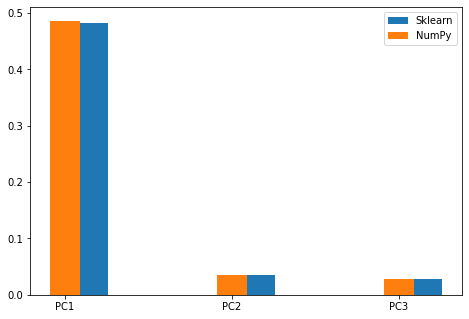

In [155]:
import matplotlib.pyplot as plt

tot = [three1, three2]

#fig1 = plt.figure()
#ax = fig1.add_axes([0,0,1,1])
#PCs = ['PC1', 'PC2', 'PC3']
#ax.bar(PCs, three1)
#plt.show()

#fig2 = plt.figure()
#ax = fig2.add_axes([0,0,1,1])
#PCs = ['PC1', 'PC2', 'PC3']
#ax.bar(PCs, three2)
#plt.show()

fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
PCs = ['PC1', 'PC2', 'PC3']
X = np.arange(3)
ax.bar(PCs, tot[0], width = 0.26, align = 'edge')
ax.bar(PCs, tot[1], width = 0.18, align = 'center')
ax.legend(['Sklearn', 'NumPy'])
plt.show()

In [158]:
print(vecs[len(vals)-1].shape)

(75,)
